<a href="https://colab.research.google.com/github/Harsha1569/DSP_Lab/blob/main/Experiment_4/Experiment__4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Note: Roll Number = 191EE123 <br> a = 1 + mod(123,3) = 1

In [104]:
import numpy as np
import IPython
import scipy
import math
import pandas as pd
import io
from IPython.display import Audio, display
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import rcParams
from scipy import signal as sp
from scipy.io import wavfile
from scipy.fftpack import fft
from scipy.signal import find_peaks



a = 1
pi = np.pi


%matplotlib inline
plt.style.use(['seaborn-notebook'])
plt.rcParams.update({
    "font.serif": ["cm"],
    "mathtext.fontset": "cm",
    "figure.figsize": (15, 8),
    "axes.labelsize": 15,
    "font.size": 8})

# **Problem** **1**. <br>
Part 1:

Here the the signal frequency is of the unit amplitude sinusoid is $15\alpha$ = 15Hz. <br>
Given sampling rate = 120$\frac{samples}{sec}$

In [105]:
Fs = 120
n=np.arange(0, 2, (1/Fs))
def sinusoidal_signal(t):
  return np.sin(2*pi*15*a*t)



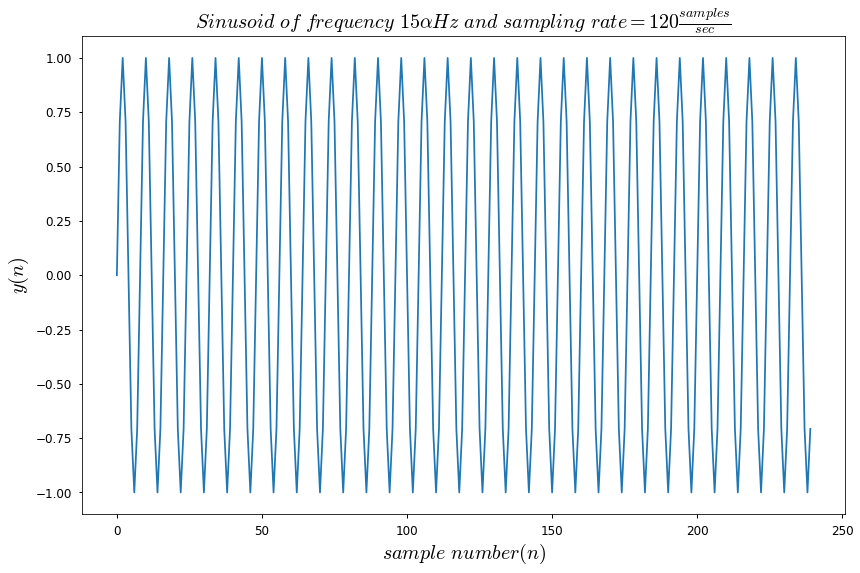

In [106]:
fig, axs = plt.subplots(figsize=(12,8))
def plot_signal(x, y, xaxis_label=None, yaxis_label=None):  
    axs.plot(x, y)
    axs.set_title(r'$Sinusoid\ of\ frequency\ 15\alpha Hz\ and\ sampling\ rate = 120\frac{samples}{sec}$', fontsize = 20)
    axs.set_xlabel(xaxis_label, fontsize = 20)
    axs.set_ylabel(yaxis_label, fontsize = 20)
    axs.tick_params(axis="both", labelsize = 12)
    fig.tight_layout()
    
plot_signal(n*Fs, sinusoidal_signal(n), xaxis_label=r'$sample\ number(n)$', yaxis_label=r'$y(n)$')
fig.savefig('fig1.png')

Number of samples: 120


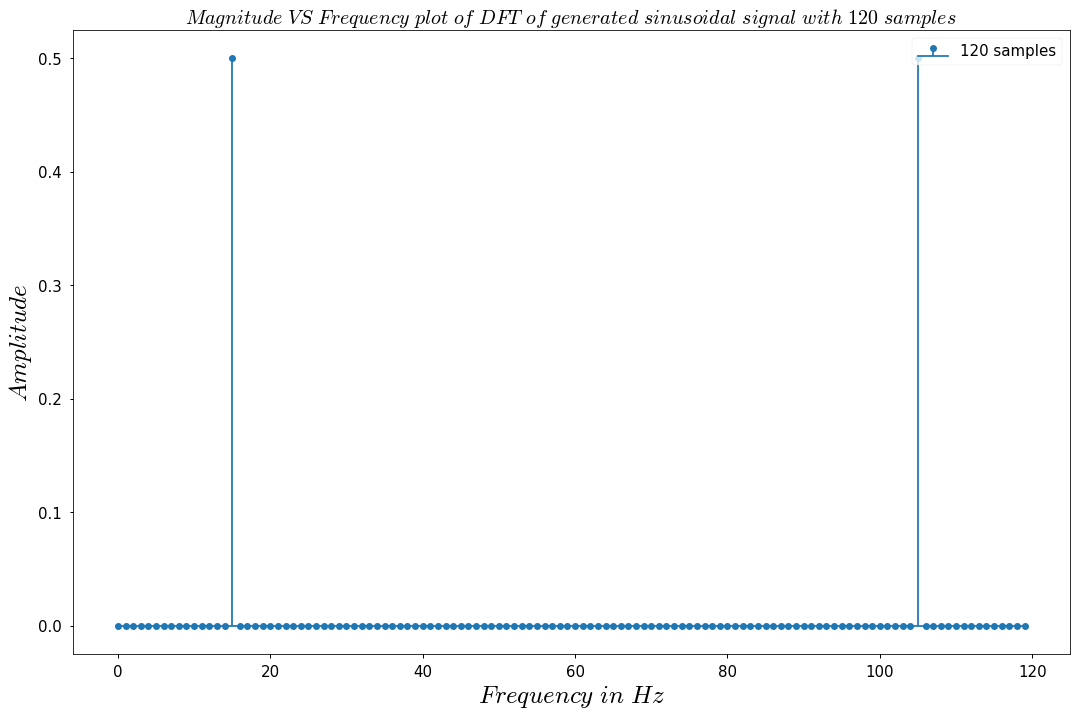

In [107]:
def plot_spec(x, Fs,samples=None,xaxis_label=None, yaxis_label=None,norm = False,color='C0',combine_fig = False, title=None, samples2=None, lgnd=None):
  if samples == None:
    S = int(len(x)/2)
  else:
    S = samples

    N = Fs * np.arange(0,S)/S;    
    X = np.abs(np.fft.fft(x[0:S]))
    
    X_normalised = X
    if norm:
        X_normalised = (1/len(N)) * X

    fig, axs = plt.subplots(figsize=(15,10))
    
    if color == None:
      axs.stem(N, X_normalised, use_line_collection = True)
    else:
      axs.stem(N, X_normalised,color,label = lgnd, use_line_collection = True, linefmt=color,  basefmt=color)
      axs.legend(loc = 'upper right', fontsize = 15)

    axs.set_title(title, fontsize = 20)
    axs.set_xlabel(xaxis_label, fontsize = 25)
    axs.set_ylabel(yaxis_label, fontsize = 25)
    axs.tick_params(axis="both", labelsize = 15)
    fig.tight_layout()  


    if combine_fig == True:
      if samples2 == None:
        Sc = int(len(x)/2)
      else:
        Sc = samples2
      Nc = Fs * np.arange(0,Sc)/Sc;    
      Xc = np.abs(np.fft.fft(x[0:Sc]))
      Xc_normalised = Xc

      if norm:
        Xc_normalised = (1/len(Nc)) * Xc

      axs.stem(Nc, Xc_normalised,'r',label ='130 samples', use_line_collection = True, linefmt='r',  basefmt='r')
      axs.legend(loc = 'upper right', fontsize = 15)
      fig.tight_layout() 

    fig.savefig('fig2.png')
    
    return N, X_normalised

N1, _= plot_spec(sinusoidal_signal(n), Fs = 120,samples=120,xaxis_label=r'$Frequency\ in\ Hz$', yaxis_label=r'$Amplitude$',norm = True,title = r"$Magnitude\ VS\ Frequency\ plot\ of\ DFT\ of\ generated\ sinusoidal\ signal\ with\ 120\ samples$", lgnd ='120 samples')
print("Number of samples:",len(N1))

Part 2:

Number of samples: 130


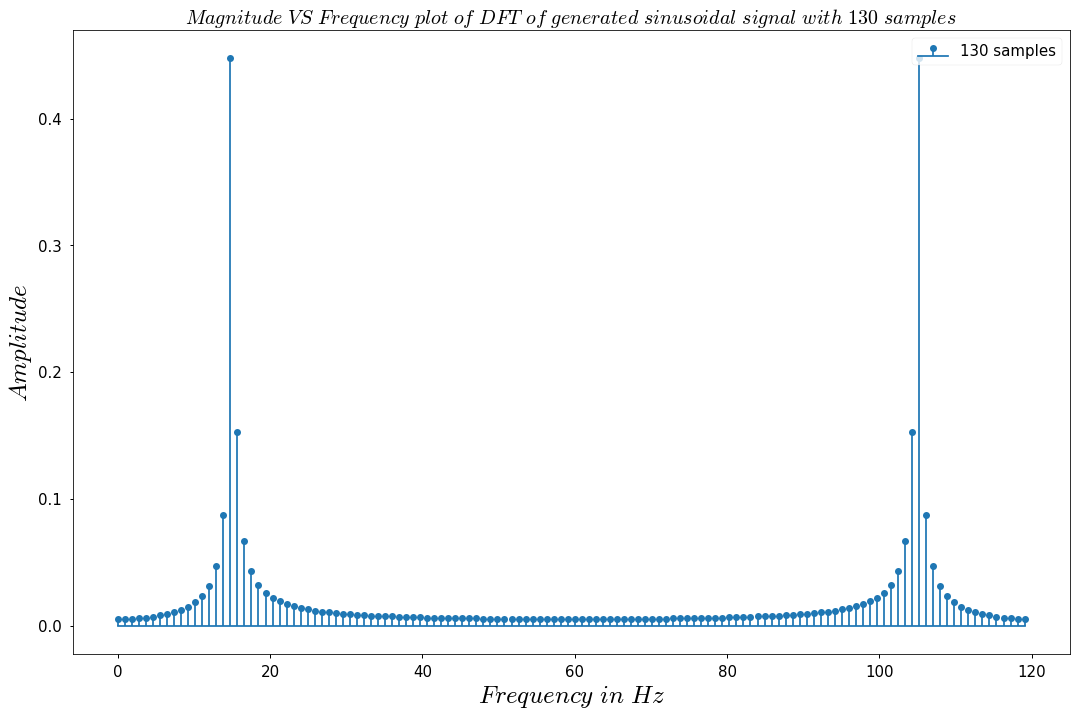

In [108]:
N2, _= plot_spec(sinusoidal_signal(n), Fs = 120,samples=130,xaxis_label=r'$Frequency\ in\ Hz$', yaxis_label=r'$Amplitude$',norm = True,title = r"$Magnitude\ VS\ Frequency\ plot\ of\ DFT\ of\ generated\ sinusoidal\ signal\ with\ 130\ samples$", lgnd ='130 samples')
print("Number of samples:",len(N2))

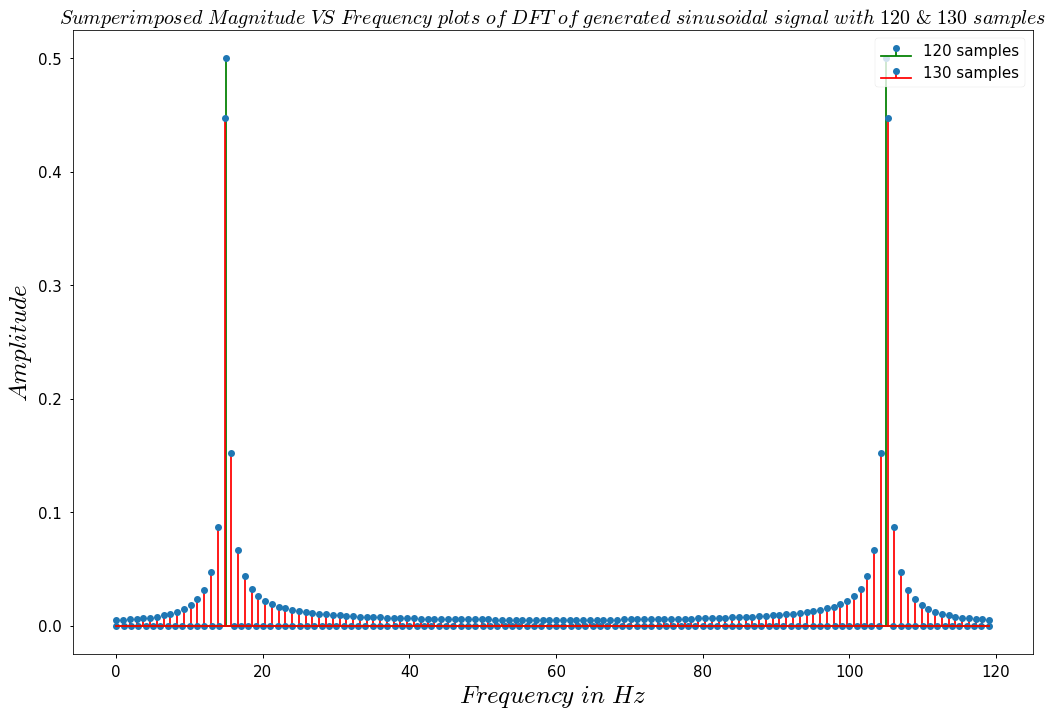

In [109]:
N3, _=plot_spec(sinusoidal_signal(n), Fs = 120,samples=120,xaxis_label=r'$Frequency\ in\ Hz$', yaxis_label=r'$Amplitude$',norm = True, color = 'g', combine_fig=True, title = r"$Sumperimposed\ Magnitude\ VS\ Frequency\ plots\ of\ DFT\ of\ generated\ sinusoidal\ signal\ with\ 120\ &\ 130\ samples$", samples2=130, lgnd= '120 samples')


In the above figure the stem plot in 'green' represents the DFT of the generated sinusoidal signal with 120 samples while the on in 'red' represents the DFT of the generated sinusoidal signal with 130 samples.


Part 3: <br>
For the first N points of the DFT of the signal to match the first 120 samples of the signal, the value of N can take any integral multiple of 120, i.e., N = 120*n, where n = 2,3.....<br>
Here we take the exampple of n = 2, i.e. N = 240

In [113]:
def dft(x, Fs,samples=None, norm=False):
  if samples == None:
    S = int(len(x)/2)
  else:
    S = samples

    N = Fs * np.arange(0,S)/S;    
    X = np.abs(np.fft.fft(x[0:S]))
    
    X_normalised = X
    if norm:
        X_normalised = (1/len(N)) * X
   
    return N, X_normalised

In [114]:
N, X= dft(signal(n), Fs = 120,samples=240, norm=True)
print("Number of samples:",len(N))
Ns, Xs= dft(signal(n), Fs = 120,samples=120, norm=True)
print("Number of samples:",len(Ns))

Number of samples: 240
Number of samples: 120


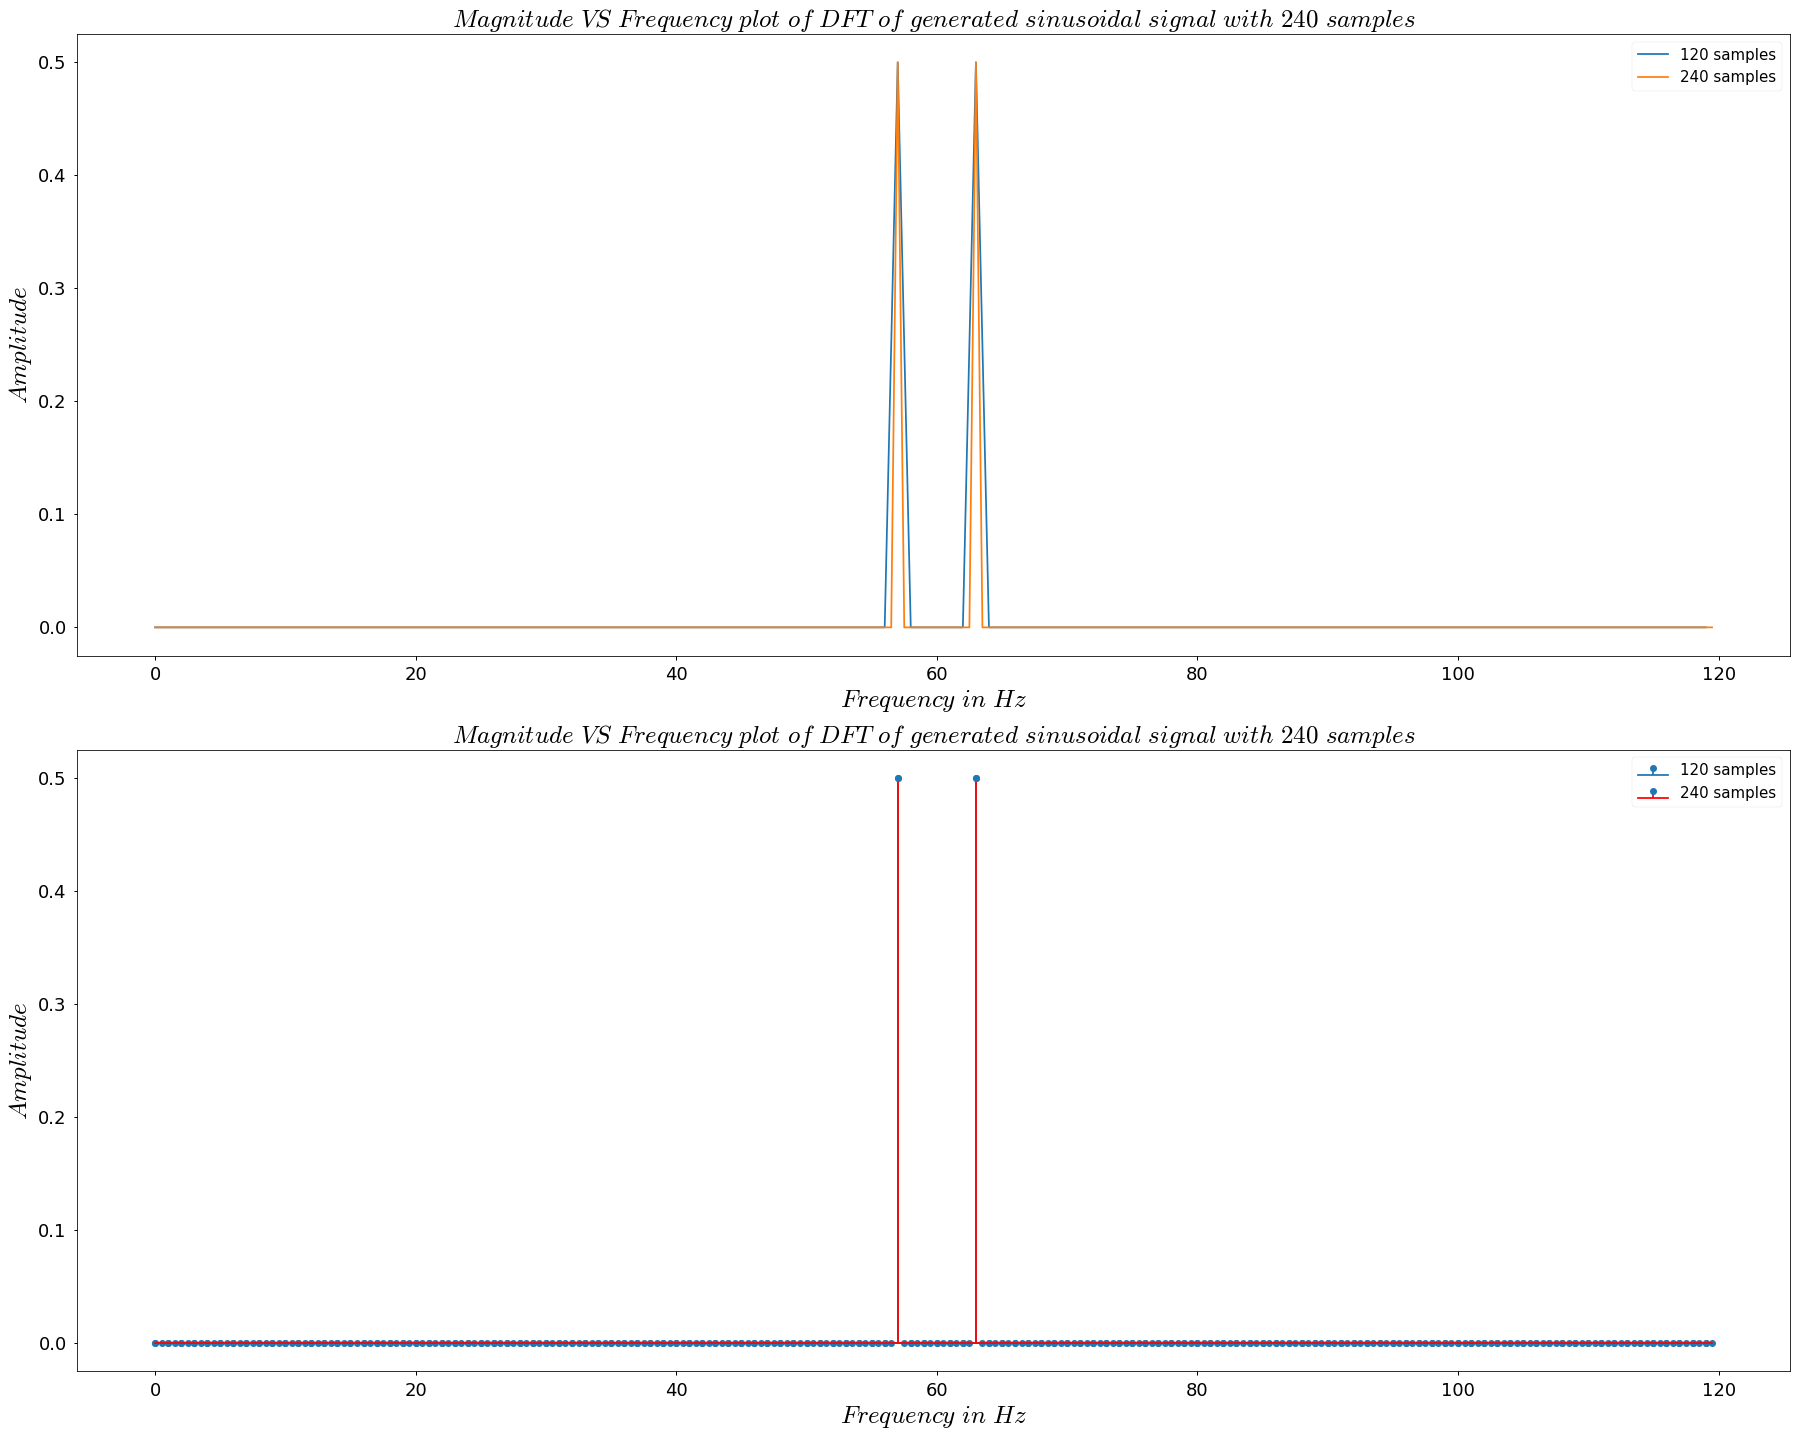

In [115]:
fig, axs = plt.subplots(2, figsize=(25,20))
def plot_s(N, X,samples=None,xaxis_label=None, yaxis_label=None, title=None, row=None, pt=None, lgnd =  None, color ='C0'):
    S = samples
    if pt ==None:
      axs[row].plot(N,X, label = lgnd)
      axs[row].legend(loc = 'upper right', fontsize = 15)
    else:
      axs[row].stem(N, X,color, label=lgnd, use_line_collection=True, linefmt=color,  basefmt=color)
      axs[row].legend(loc = 'upper right', fontsize = 15)

    axs[row].set_title(title, fontsize = 25)
    axs[row].set_xlabel(xaxis_label, fontsize = 25)
    axs[row].set_ylabel(yaxis_label, fontsize = 25)
    axs[row].tick_params(axis="both", labelsize = 18)
    fig.tight_layout()  

plot_s(Ns,Xs,samples=120,xaxis_label=r'$Frequency\ in\ Hz$', yaxis_label=r'$Amplitude$',title = r"$Magnitude\ VS\ Frequency\ plot\ of\ DFT\ of\ generated\ sinusoidal\ signal\ with\ 240\ samples$", row=0, lgnd = '120 samples')
plot_s(Ns,Xs,samples=120,xaxis_label=r'$Frequency\ in\ Hz$', yaxis_label=r'$Amplitude$',title = r"$Magnitude\ VS\ Frequency\ plot\ of\ DFT\ of\ generated\ sinusoidal\ signal\ with\ 240\ samples$", row=1, pt =1, lgnd = '120 samples')
plot_s(N,X,samples=240,xaxis_label=r'$Frequency\ in\ Hz$', yaxis_label=r'$Amplitude$',title = r"$Magnitude\ VS\ Frequency\ plot\ of\ DFT\ of\ generated\ sinusoidal\ signal\ with\ 240\ samples$", row=0, lgnd = '240 samples')
plot_s(N,X,samples=240,xaxis_label=r'$Frequency\ in\ Hz$', yaxis_label=r'$Amplitude$',title = r"$Magnitude\ VS\ Frequency\ plot\ of\ DFT\ of\ generated\ sinusoidal\ signal\ with\ 240\ samples$", row=1, pt =1, lgnd = '240 samples', color= 'r')
fig.savefig('fig9.png')

# **Problem** **2**. <br>
Part 1: for $\alpha$=1 <br>
A = 120 <br>
B = 126


In [116]:
A = 120
B = 126
Fs = 200
n=np.arange(0, 10, (1/Fs))
def signal(t):
  return 0.1*np.sin(pi*A*t) + np.cos(pi*B*t)

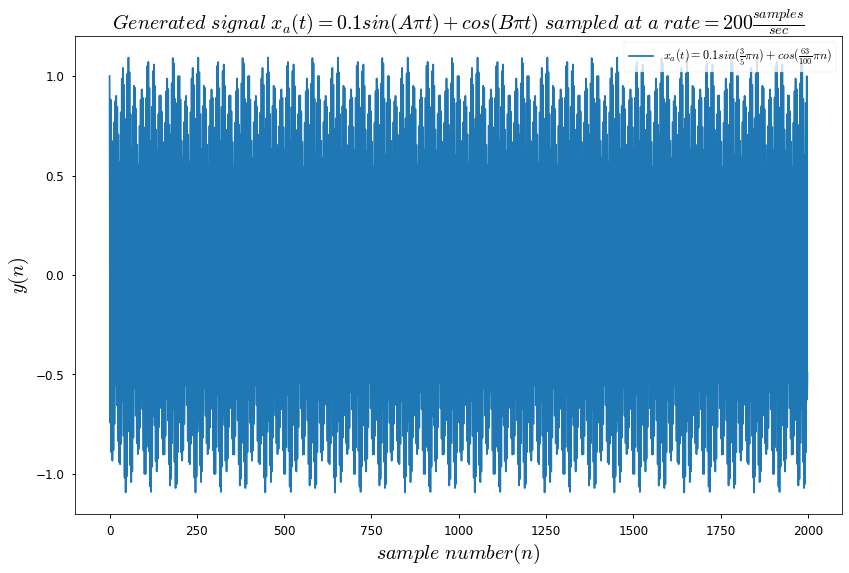

In [117]:
fig, axs = plt.subplots(figsize=(12,8))
def plot_signal(x, y, xaxis_label=None, yaxis_label=None):  
    axs.plot(x, y, label = r'$x_{a}(t)=0.1sin(\frac{3}{5} \pi n)+ cos(\frac{63}{100}\pi n)$')
    axs.legend(loc = 'upper right', fontsize = 12)
    axs.set_title(r'$Generated\ signal\ x_{a}(t)=0.1sin(A \pi t)+ cos(B\pi t)\ sampled\ at\ a\ rate = 200\frac{samples}{sec}$', fontsize = 20)
    axs.set_xlabel(xaxis_label, fontsize = 20)
    axs.set_ylabel(yaxis_label, fontsize = 20)
    axs.tick_params(axis="both", labelsize = 12)
    fig.tight_layout()
    
plot_signal(n*Fs, signal(n), xaxis_label=r'$sample\ number(n)$', yaxis_label=r'$y(n)$')
fig.savefig('fig3.png')

In [118]:
def dft(x, Fs,samples=None, norm=False):
  if samples == None:
    S = int(len(x)/2)
  else:
    S = samples

    N = Fs * np.arange(0,S)/S;    
    X = np.abs(np.fft.fft(x[0:S]))
    
    X_normalised = X
    if norm:
        X_normalised = (1/len(N)) * X
   
    return N, X_normalised

Part 2: 


In [119]:
N1, X1= dft(signal(n), Fs = 200,samples=215, norm=True)
print("Number of samples:",len(N1))
N2, X2= dft(signal(n), Fs = 200,samples=415,norm=True)
print("Number of samples:",len(N2))
N3, X3= dft(signal(n), Fs = 200,samples=1115,norm=True)
print("Number of samples:",len(N3))
N4, X4= dft(signal(n), Fs = 200,samples=1515,norm=True)
print("Number of samples:",len(N4))
N5, X5= dft(signal(n), Fs = 200,samples=1915, norm=True)
print("Number of samples:",len(N5))

Number of samples: 215
Number of samples: 415
Number of samples: 1115
Number of samples: 1515
Number of samples: 1915


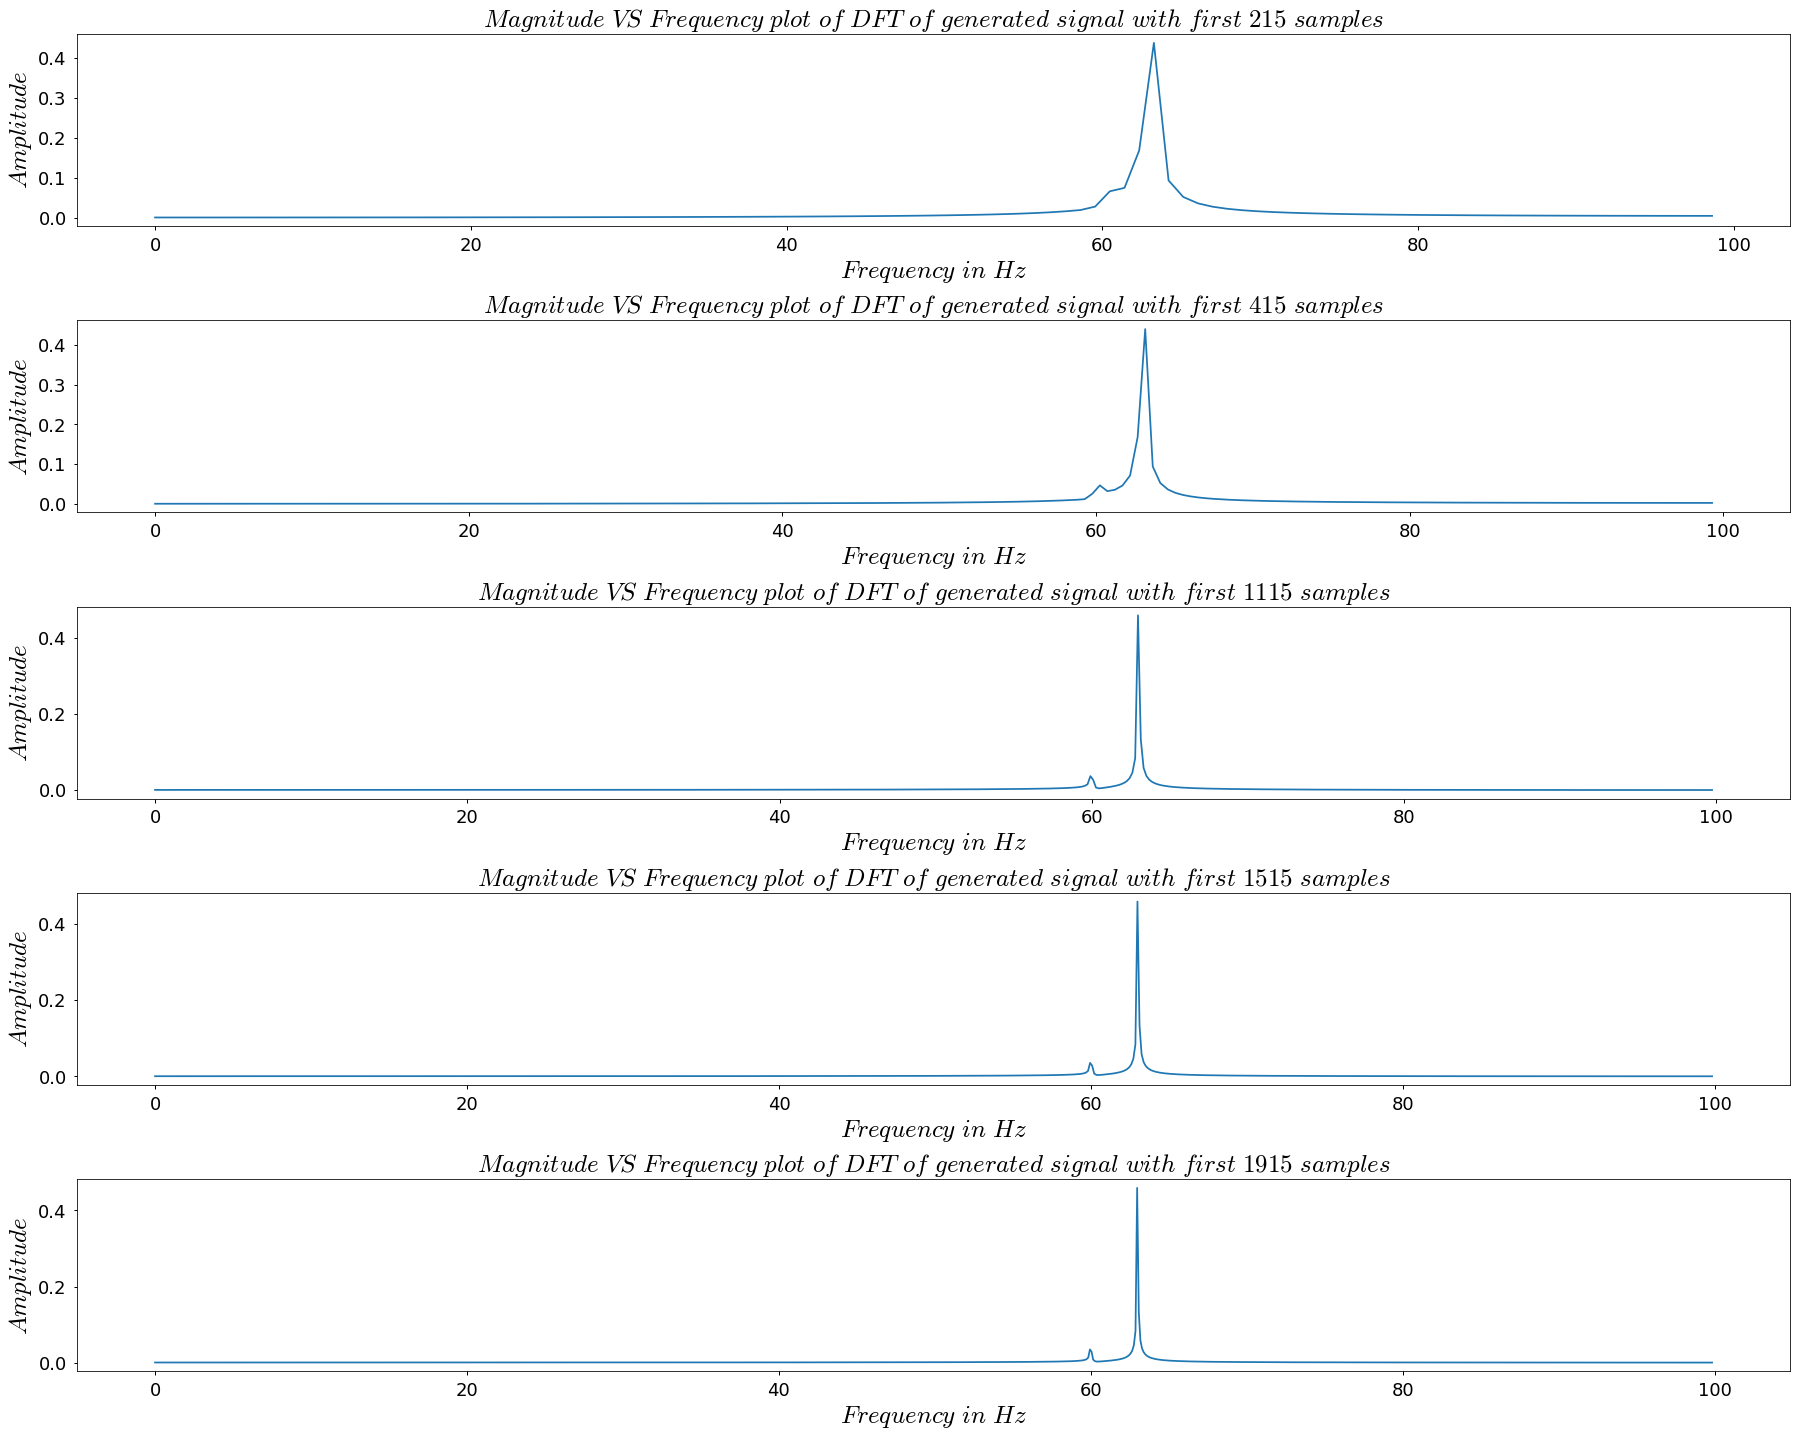

In [120]:
fig, axs = plt.subplots(5, figsize=(25,20))
def plot_s(N, X,samples=None,xaxis_label=None, yaxis_label=None, title=None, row=None):
    S = samples
    axs[row].plot(N[0:int(S/2)], X[0:int(S/2)])

    axs[row].set_title(title, fontsize = 25)
    axs[row].set_xlabel(xaxis_label, fontsize = 25)
    axs[row].set_ylabel(yaxis_label, fontsize = 25)
    axs[row].tick_params(axis="both", labelsize = 18)
    fig.tight_layout()  
    
plot_s(N1,X1,samples=215,xaxis_label=r'$Frequency\ in\ Hz$', yaxis_label=r'$Amplitude$',title = r"$Magnitude\ VS\ Frequency\ plot\ of\ DFT\ of\ generated\ signal\ with\ first\ 215\ samples$", row=0)  
plot_s(N2,X2,samples=415,xaxis_label=r'$Frequency\ in\ Hz$', yaxis_label=r'$Amplitude$',title = r"$Magnitude\ VS\ Frequency\ plot\ of\ DFT\ of\ generated\ signal\ with\ first\ 415\ samples$", row=1)  
plot_s(N3,X3,samples=1115,xaxis_label=r'$Frequency\ in\ Hz$', yaxis_label=r'$Amplitude$',title = r"$Magnitude\ VS\ Frequency\ plot\ of\ DFT\ of\ generated\ signal\ with\ first\ 1115\ samples$", row=2)  
plot_s(N4,X4,samples=1515,xaxis_label=r'$Frequency\ in\ Hz$', yaxis_label=r'$Amplitude$',title = r"$Magnitude\ VS\ Frequency\ plot\ of\ DFT\ of\ generated\ signal\ with\ first\ 1515\ samples$", row=3)  
plot_s(N5,X5,samples=1915,xaxis_label=r'$Frequency\ in\ Hz$', yaxis_label=r'$Amplitude$',title = r"$Magnitude\ VS\ Frequency\ plot\ of\ DFT\ of\ generated\ signal\ with\ first\ 1915\ samples$", row=4)  
fig.savefig('fig4.png')




# **Problem** **3**. <br>
Part 1: $\alpha$=1
Hamming window is used <br>
A = 120 <br>
B = 126

In [121]:
A = 120
B = 126
Fs = 200
n=np.arange(0, 10, (1/Fs))
def signal(t):
  return 0.1*np.sin(pi*A*t) + np.cos(pi*B*t)

In [122]:
sample = [215,415,1115,1515,1915]
y = [] 
h = [] 
y_windowed = []
for i in range(len(sample)):
    y.append(signal(n)[0:sample[i]])
    h.append(np.hamming(sample[i])) # generating hamming windows of correponding length
    y_windowed.append(y[i]*h[i]) #multiplying xa with corresponding window of same length

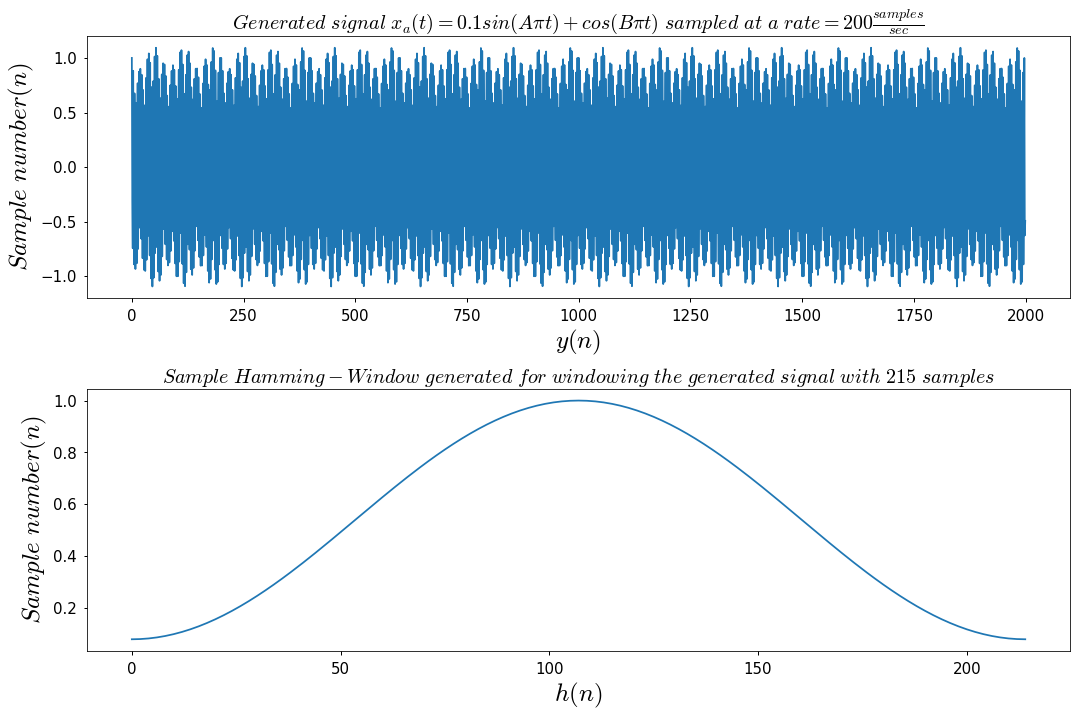

In [123]:
fig, axs = plt.subplots(2, figsize=(15,10))
def plot_s(X,xaxis_label=None, yaxis_label=None, title=None, row=None):
    axs[row].plot(X)

    axs[row].set_title(title, fontsize = 20)
    axs[row].set_xlabel(xaxis_label, fontsize = 25)
    axs[row].set_ylabel(yaxis_label, fontsize = 25)
    axs[row].tick_params(axis="both", labelsize = 15)
    fig.tight_layout()  
    
plot_s(signal(n),xaxis_label=r'$y(n)$', yaxis_label=r'$Sample\ number (n)$',title = r'$Generated\ signal\ x_{a}(t)=0.1sin(A \pi t)+ cos(B\pi t)\ sampled\ at\ a\ rate = 200\frac{samples}{sec}$', row=0)  
plot_s(h[0],xaxis_label=r'$h(n)$', yaxis_label=r'$Sample\ number (n)$',title = r"$Sample\ Hamming-Window\ generated\ for\ windowing\ the\ generated\ signal\ with\ 215\ samples $", row=1)  
fig.savefig('fig5.png')

Part 2:

In [124]:
n1, x1= dft(y_windowed[0], Fs = 200,samples=215, norm=True)
print("Number of samples:",len(N1))
n2, x2= dft(y_windowed[1], Fs = 200,samples=415,norm=True)
print("Number of samples:",len(N2))
n3, x3= dft(y_windowed[2], Fs = 200,samples=1115,norm=True)
print("Number of samples:",len(N3))
n4, x4= dft(y_windowed[3], Fs = 200,samples=1515,norm=True)
print("Number of samples:",len(N4))
n5, x5= dft(y_windowed[4], Fs = 200,samples=1915, norm=True)
print("Number of samples:",len(N5))

Number of samples: 215
Number of samples: 415
Number of samples: 1115
Number of samples: 1515
Number of samples: 1915


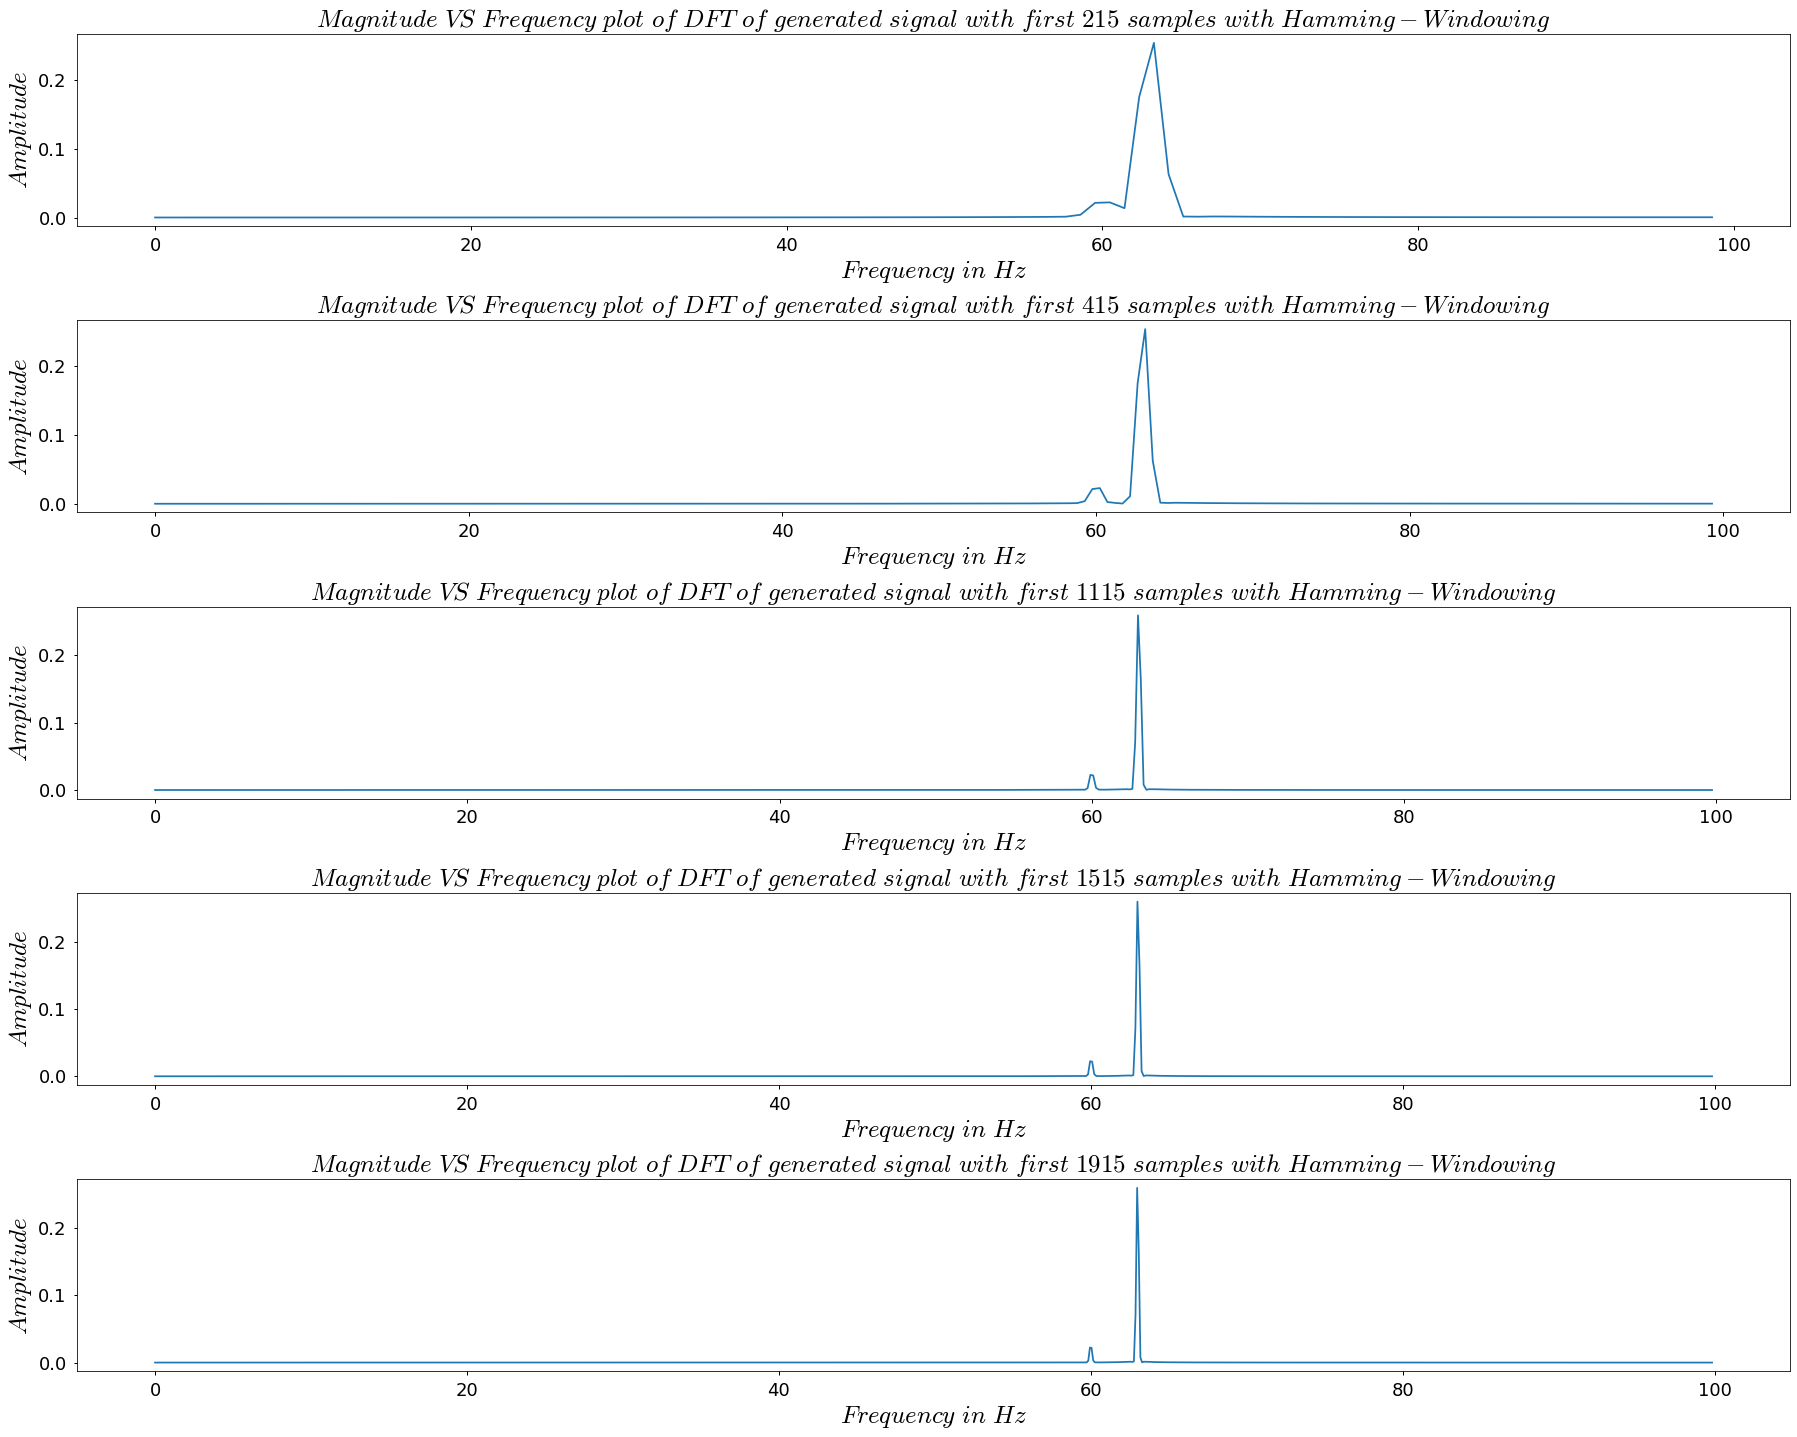

In [125]:
fig, axs = plt.subplots(5, figsize=(25,20))
def plot_s(N, X,samples=None,xaxis_label=None, yaxis_label=None, title=None, row=None):
    S = samples
    axs[row].plot(N[0:int(S/2)], X[0:int(S/2)])

    axs[row].set_title(title, fontsize = 25)
    axs[row].set_xlabel(xaxis_label, fontsize = 25)
    axs[row].set_ylabel(yaxis_label, fontsize = 25)
    axs[row].tick_params(axis="both", labelsize = 18)
    fig.tight_layout()  
    
plot_s(n1,x1,samples=215,xaxis_label=r'$Frequency\ in\ Hz$', yaxis_label=r'$Amplitude$',title = r"$Magnitude\ VS\ Frequency\ plot\ of\ DFT\ of\ generated\ signal\ with\ first\ 215\ samples\ with\ Hamming-Windowing$", row=0)  
plot_s(n2,x2,samples=415,xaxis_label=r'$Frequency\ in\ Hz$', yaxis_label=r'$Amplitude$',title = r"$Magnitude\ VS\ Frequency\ plot\ of\ DFT\ of\ generated\ signal\ with\ first\ 415\ samples\ with\ Hamming-Windowing$", row=1)  
plot_s(n3,x3,samples=1115,xaxis_label=r'$Frequency\ in\ Hz$', yaxis_label=r'$Amplitude$',title = r"$Magnitude\ VS\ Frequency\ plot\ of\ DFT\ of\ generated\ signal\ with\ first\ 1115\ samples\ with\ Hamming-Windowing$", row=2)  
plot_s(n4,x4,samples=1515,xaxis_label=r'$Frequency\ in\ Hz$', yaxis_label=r'$Amplitude$',title = r"$Magnitude\ VS\ Frequency\ plot\ of\ DFT\ of\ generated\ signal\ with\ first\ 1515\ samples\ with\ Hamming-Windowing$", row=3)  
plot_s(n5,x5,samples=1915,xaxis_label=r'$Frequency\ in\ Hz$', yaxis_label=r'$Amplitude$',title = r"$Magnitude\ VS\ Frequency\ plot\ of\ DFT\ of\ generated\ signal\ with\ first\ 1915\ samples\ with\ Hamming-Windowing$", row=4)  
fig.savefig('fig6.png')

# **Problem** **4**. <br>
Part 1:

In [126]:
file = np.loadtxt("Exp4Data1.txt",delimiter=',')
N = 600
x = np.hstack((file,np.zeros(N-len(file))))
print("Original length before padding: {}".format(len(file)))
original_length = len(file)
new_length = len(x)
print("new length before after padding: {}".format(new_length))
hamming_window = np.hamming(N)
dft1 = fft(hamming_window*x, N)

Original length before padding: 500
new length before after padding: 600


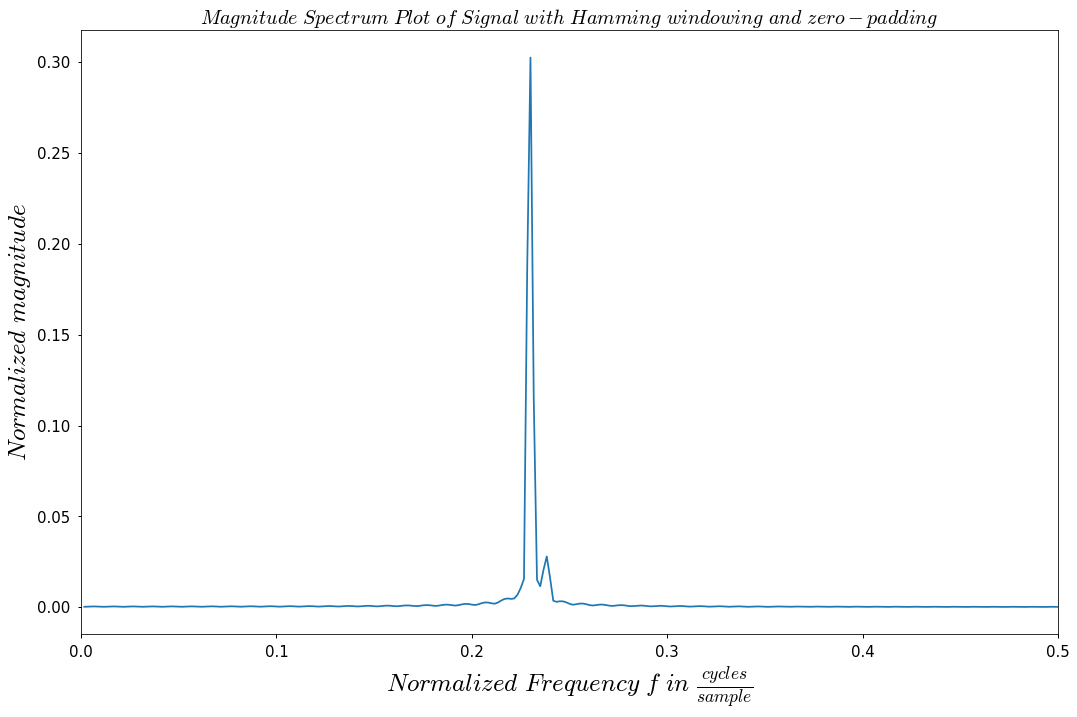

In [127]:
def plot_s(N, X,xaxis_label=None, yaxis_label=None, title=None):
  fig, axs = plt.subplots(figsize=(15,10))
  axs.plot(N, X)
  axs.set_xlim([0,0.5])
  axs.set_title(title, fontsize = 20)
  axs.set_xlabel(xaxis_label, fontsize = 25)
  axs.set_ylabel(yaxis_label, fontsize = 25)
  axs.tick_params(axis="both", labelsize = 15)
  fig.tight_layout() 

plot_s((1/N)*np.arange(1, N+1), np.abs((dft1/original_length)), title=r'$Magnitude\ Spectrum\ Plot\ of\ Signal\ with\ Hamming\ windowing\ and\ zero-padding$', xaxis_label=r'$Normalized\ Frequency\ f\ in\ \frac{cycles}{sample}$', yaxis_label=r'$Normalized\ magnitude$')
fig.savefig('fig7.png')

In [128]:
peaks_1=sp.find_peaks(np.abs(dft1), prominence=0.5)[0]
print('The 2 frequency components of the signal found using Hamming-Window are: {} & {} '.format(peaks_1[0]/N, peaks_1[1]/N))

The 2 frequency components of the signal found using Hamming-Window are: 0.22833333333333333 & 0.23666666666666666 


Part 2:

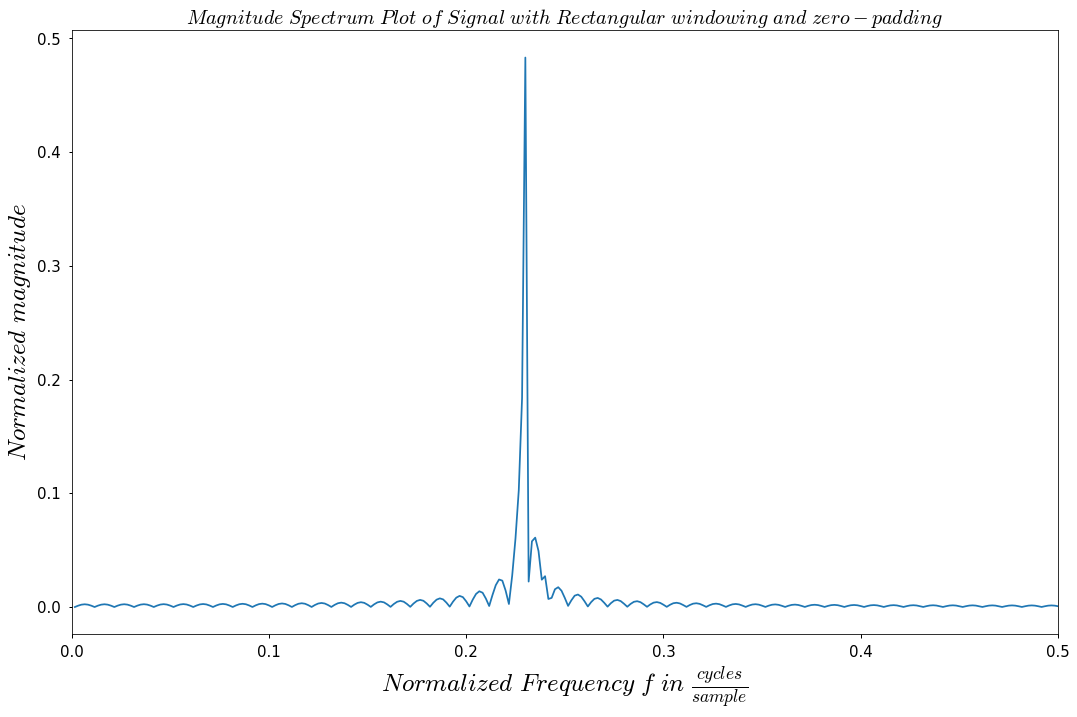

In [129]:
rectangular_window = sp.windows.boxcar(N)
dft2 = fft(rectangular_window*x, N)
plot_s((1/N)*np.arange(1, N+1), np.abs((dft2/original_length)), title=r'$Magnitude\ Spectrum\ Plot\ of\ Signal\ with\ Rectangular\ windowing\ and\ zero-padding$', xaxis_label=r'$Normalized\ Frequency\ f\ in\ \frac{cycles}{sample}$', yaxis_label=r'$Normalized\ magnitude$')
fig.savefig('fig8.png')

In [130]:
peaks_2=sp.find_peaks(np.abs(dft2), prominence=15)[0]
print('The 2 frequency components of the signal found using Rectangular-Window are: {} & {} '.format(peaks_2[0]/N, peaks_2[1]/N))

The 2 frequency components of the signal found using Rectangular-Window are: 0.22833333333333333 & 0.23333333333333334 
